Importando as principais bibliotecas

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt

Tomada de dados (arquivos .csv)

In [7]:
# data_b: dados de treino
data_b = pd.read_csv("bike-sharing-demand/train.csv")
data_b.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
# data_t: dados de teste
data_t = pd.read_csv("bike-sharing-demand/test.csv")
data_t.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


Verificando a existência de valores null

In [9]:
data_b.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Verificando correlações...

<AxesSubplot:>

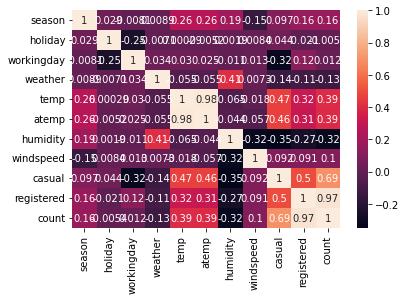

In [10]:
# Visualizando as correlações
correlacao = data_b.corr()
plt.figure()
sns.heatmap(data=correlacao, annot=True)

...e os tipos

In [11]:
# Verificando os tipos das colunas
data_b.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

Novas colunas em <i>train</i> e <i>test</i>

In [12]:
# Modificando a tabela, colocando as colunas de "ano", "mês", "dia" e "hora" com base na coluna datetime

# Lista para treino
year_b = []
month_b = []
day_b = []
hour_b = []

# Lista para teste
year_t = []
month_t = []
day_t = []
hour_t = []

# Criando as listas
for datetime in data_b["datetime"]:
    year_b.append(int(datetime[0:4]))
    month_b.append(int(datetime[5:7]))
    day_b.append(int(datetime[8:10]))
    hour_b.append(int(datetime[11:13]))

for datetime in data_t["datetime"]:
    year_t.append(int(datetime[0:4]))
    month_t.append(int(datetime[5:7]))
    day_t.append(int(datetime[8:10]))
    hour_t.append(int(datetime[11:13]))

# Adicinando as listas às tabelas
data_b["year"] = year_b
data_b["month"] = month_b
data_b["day"] = day_b
data_b["hour"] = hour_b

data_t["year"] = year_t
data_t["month"] = month_t
data_t["day"] = day_t
data_t["hour"] = hour_t

# Visualizando as novas colunas
data_b.head()
data_t.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4


Verificando novas correlações

<AxesSubplot:>

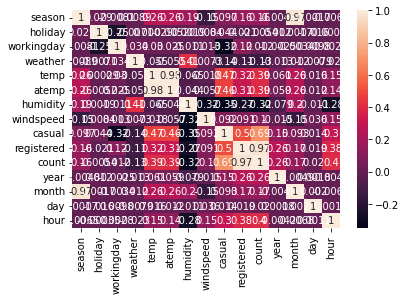

In [13]:
correlacao = data_b.corr()
plt.figure()
sns.heatmap(data=correlacao, annot=True)

In [17]:
# Checando as correlações
correlacao

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.004797,0.971524,0.001729,-0.006546
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.015877,-0.000354
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,0.009829,0.002780
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,0.012144,-0.007890,-0.022740
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,0.015551,0.145430
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,0.011866,0.140343
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.011335,-0.278011
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,0.036157,0.146631
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.014109,0.302045
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,0.019111,0.380540


#### Interpretando dados
Aqui, percebe-se que existe um horário razoavelmente bem definido para os usuários casuais - que não são registrados na plataforma de aluguel de bicicletas. Este horário não é o de trabalho.

<AxesSubplot:xlabel='hour', ylabel='casual'>

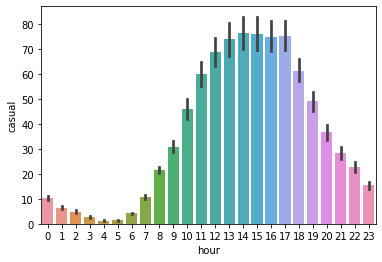

In [18]:
# Análise da hora com os usuários casuais
sns.barplot(x="hour", y="casual", data=data_b)

Já para os usuários registrados, os horários de pico podem registrar a ida e volta ao trabalho, dado a ser confirmado mais a frente.

<AxesSubplot:xlabel='hour', ylabel='registered'>

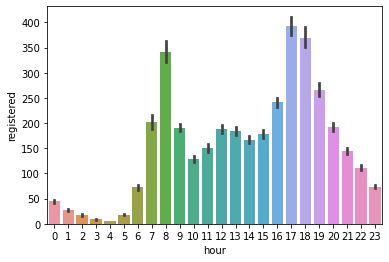

In [19]:
# Análise da hora com os usuários registrados
sns.barplot(x="hour", y="registered", data=data_b)

Noção dos dados

In [20]:
# Para ter uma maios noção dos dados
data_b.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,11.541613
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,6.915838
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,6.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000,12.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000,18.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,23.000000


Separando apenas os dias de trabalho

In [14]:
# Uma tabela apenas com os dias de trabalho
data_registered_workingday = data_b[data_b["workingday"] == 1]
data_registered_workingday.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
47,2011-01-03 00:00:00,1,0,1,1,9.02,9.850,44,23.9994,0,5,5,2011,1,3,0
48,2011-01-03 01:00:00,1,0,1,1,8.20,8.335,44,27.9993,0,2,2,2011,1,3,1
49,2011-01-03 04:00:00,1,0,1,1,6.56,6.820,47,26.0027,0,1,1,2011,1,3,4
50,2011-01-03 05:00:00,1,0,1,1,6.56,6.820,47,19.0012,0,3,3,2011,1,3,5
51,2011-01-03 06:00:00,1,0,1,1,5.74,5.305,50,26.0027,0,30,30,2011,1,3,6


<AxesSubplot:xlabel='hour', ylabel='casual'>

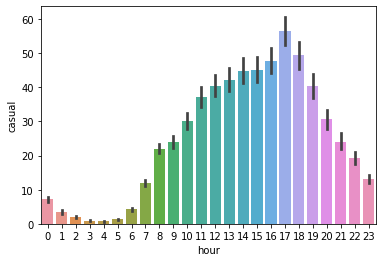

In [22]:
# Análise sobre a nova tabela
sns.barplot(x="hour", y="casual", data=data_registered_workingday)

<AxesSubplot:xlabel='month', ylabel='casual'>

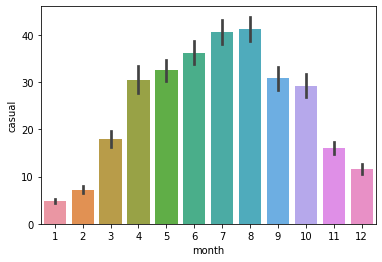

In [23]:
# Influência do mês com os usuários casuais
sns.barplot(x="month", y="casual", data=data_registered_workingday)

<AxesSubplot:xlabel='hour', ylabel='registered'>

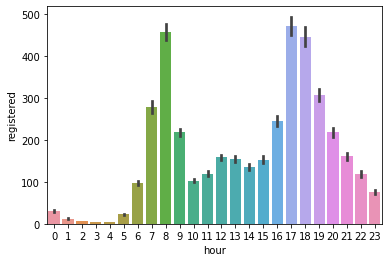

In [24]:
# Para a nova tabela, a influência da hora para os usuários registrados
sns.barplot(x="hour", y="registered", data=data_registered_workingday)

<AxesSubplot:xlabel='month', ylabel='registered'>

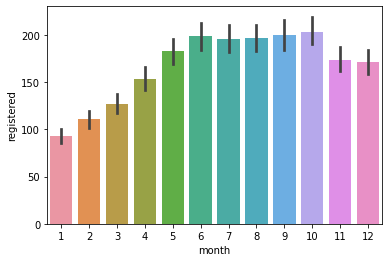

In [25]:
# Influência do mês para os usuários registrados
sns.barplot(x="month", y="registered", data=data_registered_workingday)

De fato, se intensifica o uso nas horas de pico relacionadas à ida e vinda do trabalho.

Agora, vamos verificar como a temperatura se relaciona com os usuários casuais.<br>
Lembrando:

temp : temperatura<br>
atemp: sensação térmica

Criar um indicador que diga se é quente ou frio<br>
0 - Frio<br>
1 - Ameno<br>
2 - Quente<br>
3 - Muito quente

In [15]:
# Criando a lista para por os dados
temp_eval_b = []

for temp in data_b["temp"]:
  if temp < 10:
    temp_eval_b.append(0)
  elif temp < 20:
    temp_eval_b.append(1)
  elif temp < 30:
    temp_eval_b.append(2)
  else:
    temp_eval_b.append(3)

# Incluindo os dados na tabela
data_b["temp_eval"] = temp_eval_b



atemp_eval_b = []

for atemp in data_b["atemp"]:
  if atemp < 10:
    atemp_eval_b.append(0)
  elif atemp < 20:
    atemp_eval_b.append(1)
  elif atemp < 30:
    atemp_eval_b.append(2)
  else:
    atemp_eval_b.append(3)
  
# Incluindo os dados na tabela
data_b["atemp_eval"] = atemp_eval_b

In [16]:
# O mesmo para a tabela de teste
temp_eval_t = []

for temp in data_t["temp"]:
  if temp < 10:
    temp_eval_t.append(0)
  elif temp < 20:
    temp_eval_t.append(1)
  elif temp < 30:
    temp_eval_t.append(2)
  else:
    temp_eval_t.append(3)

data_t["temp_eval"] = temp_eval_t



atemp_eval_t = []

for atemp in data_t["atemp"]:
  if atemp < 10:
    atemp_eval_t.append(0)
  elif atemp < 20:
    atemp_eval_t.append(1)
  elif atemp < 30:
    atemp_eval_t.append(2)
  else:
    atemp_eval_t.append(3)
  

data_t["atemp_eval"] = atemp_eval_t

In [17]:
# Anaçisando a partir dos novos dados
pd.pivot_table(data=data_b, values=["casual", "registered", "count"], index=["temp_eval", "atemp_eval"], aggfunc="max", margins=True)

casual  count  registered
temp_eval atemp_eval                           
0         0               42    501         487
          1               52    679         665
1         1              150    798         773
          2              320    837         803
2         1               97    668         625
          2              355    948         857
          3              367    977         886
3         1              144    791         647
          3              331    897         790
All                      367    977         886

In [29]:
data_b.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,temp_eval,atemp_eval
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.004797,0.971524,0.001729,-0.006546,0.264822,0.241124
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.015877,-0.000354,0.000701,-0.008369
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,0.009829,0.002780,0.032350,0.014487
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,0.012144,-0.007890,-0.022740,-0.051734,-0.068150
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,0.015551,0.145430,0.940149,0.925694
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,0.011866,0.140343,0.921864,0.946285
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.011335,-0.278011,-0.084166,-0.060762
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,0.036157,0.146631,-0.007558,-0.040783
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.014109,0.302045,0.448328,0.460151
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,0.019111,0.380540,0.315253,0.310116


<AxesSubplot:xlabel='atemp_eval', ylabel='casual'>

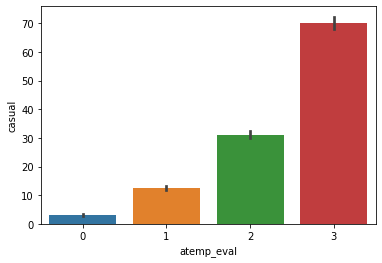

In [30]:
# Relação da sensação térmica com os usuários casuais
sns.barplot(x="atemp_eval", y="casual", data=data_b)

<AxesSubplot:xlabel='atemp_eval', ylabel='registered'>

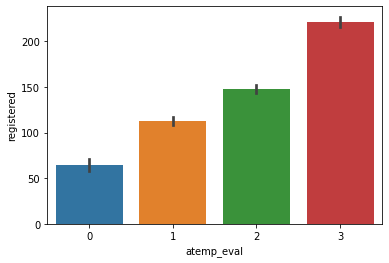

In [31]:
# Relação da sensação térmica com os usuários registrados
sns.barplot(x="atemp_eval", y="registered", data=data_b)

Como os feriados se relacionam com os usuários casuais e registrados

Analisando para a umidade e valocidade do vento

In [18]:
# Descrição dos dados a serem analisados
print("Vel. max. vento: {}".format(data_b["windspeed"].max()))
print("Vel. min. vento: {}".format(data_b["windspeed"].min()))
print("Vel. mediana vento: {}\n\n".format(data_b["windspeed"].median()))

print("Hum. Max.: {}".format(data_b["humidity"].max()))
print("Hum. Min.: {}".format(data_b["humidity"].min()))

Vel. max. vento: 56.9969
Vel. min. vento: 0.0
Vel. mediana vento: 12.998


Hum. Max.: 100
Hum. Min.: 0


Parâmetros:<br>
Humidade - <br>
    0  -  15%: Muito seco<br>
    15 -  20%: Seco<br>
    20 -  50%: Normal<br>
    50 -  75%: Húmido<br>
    75 - 100%: Muito húmido<br>


Vel. Vento - <br>
    < 12 - Baixo <br>
    < 26 - Normal <br>
    < 44 - Um pouco alto <br>
    ...  - Alto

In [19]:
# Criando novas tabelas
hum_b = []

for h in data_b.humidity.iteritems():
    if h[1] < 15:
        hum_b.append(0)
    elif h[1] < 20:
        hum_b.append(1)
    elif h[1] < 40:
        hum_b.append(2)
    elif h[1] < 60:
        hum_b.append(3)
    elif h[1] < 80:
        hum_b.append(4)
    else:
        hum_b.append(5)

wind_b = []

for w in data_b.windspeed.iteritems():
    if w[1] < 12:
        wind_b.append(0)
    elif w[1] < 26:
        wind_b.append(1)
    elif w[1] < 44:
        wind_b.append(2)
    else:
        wind_b.append(3)

data_b["hum"] = hum_b
data_b["wind"] = wind_b

In [20]:
# Para testes
hum_t = []

for h in data_t.humidity.iteritems():
    if h[1] < 15:
        hum_t.append(0)
    elif h[1] < 20:
        hum_t.append(1)
    elif h[1] < 40:
        hum_t.append(2)
    elif h[1] < 60:
        hum_t.append(3)
    elif h[1] < 80:
        hum_t.append(4)
    else:
        hum_t.append(5)

wind_t = []

for w in data_t.windspeed.iteritems():
    if w[1] < 12:
        wind_t.append(0)
    elif w[1] < 26:
        wind_t.append(1)
    elif w[1] < 44:
        wind_t.append(2)
    else:
        wind_t.append(3)

data_t["hum"] = hum_t
data_t["wind"] = wind_t

In [21]:
# Analisando novos dados
pd.pivot_table(data=data_b, values=["casual", "registered", "count"], index=["hum", "wind"], aggfunc="sum", margins=True)

casual    count  registered
hum wind                             
0   0          5       78          73
    1         69      569         500
    2         26      244         218
1   0        401     1249         848
    1       1214     3470        2256
    2       1788     4687        2899
    3         84      171          87
2   0      29554   119821       90267
    1      53748   223577      169829
    2      15611    71561       55950
    3        118      465         347
3   0      63537   309911      246374
    1      79752   416639      336887
    2      13705    70827       57122
    3        256      562         306
4   0      54020   326370      272350
    1      44850   255375      210525
    2       3396    23391       19995
5   0      20041   169176      149135
    1       8973    78101       69128
    2        987     9232        8245
All       392135  2085476     1693341

<AxesSubplot:xlabel='hum', ylabel='casual'>

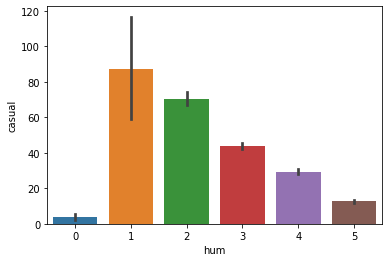

In [36]:
# Analisando as corralações da humidade com os usuários casuais
sns.barplot(x="hum", y="casual", data=data_b)

<AxesSubplot:xlabel='hum', ylabel='registered'>

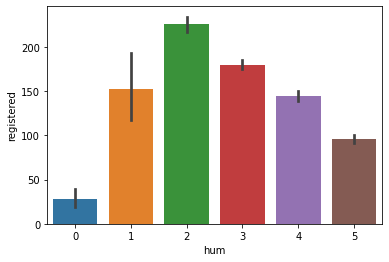

In [37]:
# Analisando as corralações da humidade com os usuários registrados
sns.barplot(x="hum", y="registered", data=data_b)

Enxergamos uma correlção nos campos 0, 2, 3, 4 e 5, porém, no intervali 1, a correlação é muito baixa. Avaliamos que para esta faixa de humidade, ela é indiferente.

<AxesSubplot:xlabel='wind', ylabel='casual'>

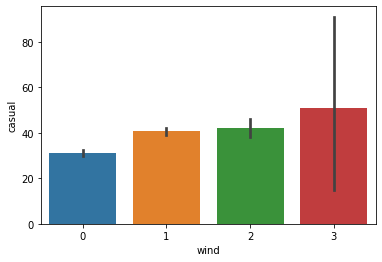

In [38]:
# Analisando as corralações da velocidade do vento com os usuários casuais
sns.barplot(x="wind", y="casual", data=data_b)

<AxesSubplot:xlabel='wind', ylabel='registered'>

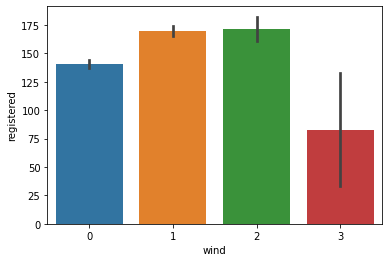

In [39]:
# Analisando as corralações da velocidade do vento com os usuários registrados
sns.barplot(x="wind", y="registered", data=data_b)

In [40]:
# Analisando as correlações da humidade com os usuários casuais e registrados
data_b.corr().loc[["humidity", "hum"], ["casual", "registered"]]

,casual,registered
humidity,-0.348187,-0.265458
hum,-0.339954,-0.250403


Análise por dia da semana

In [22]:
# Separando os dias da semana
from datetime import datetime
wk_day_b = []

for date in data_b.datetime.iteritems():
  wk_day_b.append(datetime.strptime(date[1], "%Y-%m-%d %H:%M:%S").weekday())

data_b["weekday"] = wk_day_b

In [23]:
# O mesmo que acima para testes
wk_day_t = []

for date in data_t.datetime.iteritems():
  wk_day_t.append(datetime.strptime(date[1], "%Y-%m-%d %H:%M:%S").weekday())

data_t["weekday"] = wk_day_t

<AxesSubplot:xlabel='weekday', ylabel='casual'>

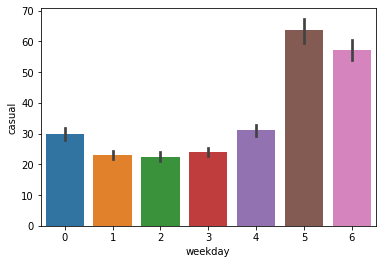

In [43]:
# Relações entre os dias da semana e os usuários casuais
sns.barplot(x="weekday", y="casual", data=data_b)

<AxesSubplot:xlabel='weekday', ylabel='registered'>

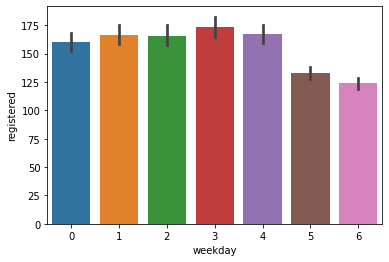

In [44]:
# Relações entre os dias da semana e os usuários registrados
sns.barplot(x="weekday", y="registered", data=data_b)

In [45]:
# Correlação do dia da semana com os usuários
data_b.corr().loc[["weekday"], ["casual", "registered"]]

,casual,registered
weekday,0.246959,-0.084427


Treino para o casual

In [46]:
data_b.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count,year,month,day,hour,temp_eval,atemp_eval,hum,wind,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,16,2011,1,1,0,0,1,5,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,40,2011,1,1,1,0,1,5,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,32,2011,1,1,2,0,1,5,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,13,2011,1,1,3,0,1,4,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,1,2011,1,1,4,0,1,4,0,5


In [47]:
data_b.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,temp_eval,atemp_eval,hum,wind,weekday
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.004797,0.971524,0.001729,-0.006546,0.264822,0.241124,0.190525,-0.127412,-0.010553
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.015877,-0.000354,0.000701,-0.008369,0.000153,0.013600,-0.191832
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,0.009829,0.002780,0.032350,0.014487,-0.007890,0.022309,-0.704267
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,0.012144,-0.007890,-0.022740,-0.051734,-0.068150,0.375961,-0.005524,-0.047692
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,0.015551,0.145430,0.940149,0.925694,-0.081398,-0.011575,-0.038466
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,0.011866,0.140343,0.921864,0.946285,-0.060079,-0.045083,-0.040235
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.011335,-0.278011,-0.084166,-0.060762,0.956932,-0.305584,-0.026507
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,0.036157,0.146631,-0.007558,-0.040783,-0.313449,0.888577,-0.024804
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.014109,0.302045,0.448328,0.460151,-0.339954,0.093741,0.246959
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,0.019111,0.380540,0.315253,0.310116,-0.250403,0.088940,-0.084427


In [24]:
# Separando as tabelas de teste e treino
x_train_casual = data_b[["season", "holiday", "workingday", "weather", "temp", "humidity", "windspeed", "year", "month", "hour", "weekday"]]
y_train_casual = data_b["casual"]

x_train_registered = data_b[["season", "holiday", "workingday", "weather", "temp", "humidity", "windspeed", "year", "month", "hour", "weekday"]]
y_train_registered = data_b["registered"]

x_test_casual = data_t[["season", "holiday", "workingday", "weather", "temp", "humidity", "windspeed", "year", "month", "hour", "weekday"]]
x_test_registered = data_t[["season", "holiday", "workingday", "weather", "temp", "humidity", "windspeed", "year", "month", "hour", "weekday"]]

In [25]:
from sklearn.ensemble import RandomForestRegressor

# Para predizer os usuários casuais
casual_dec = RandomForestRegressor(n_estimators=500)
casual_dec.fit(x_train_casual, y_train_casual)


RandomForestRegressor(n_estimators=500)

Treino para os registrados

In [26]:
# Para predizer os usuários registrados
registered_dec = RandomForestRegressor(n_estimators=500)
registered_dec.fit(x_train_registered, y_train_registered)

RandomForestRegressor(n_estimators=500)

In [27]:
# Testando as correlações
print(casual_dec.score(x_train_casual, y_train_casual))
print(registered_dec.score(x_train_registered, y_train_registered))

0.9891891883577066
0.9935913332923424


In [67]:
# Predizendo os valores
y_test_casual = casual_dec.predict(x_test_casual).astype(int)
y_test_registered = registered_dec.predict(x_test_registered).astype(int)

In [72]:
# Finalmente a coluna "count"
y_test_count = (y_test_casual + y_test_registered)

In [73]:
# Criando a tabela de submissão
submited = pd.DataFrame()

submited["datetime"] = data_t["datetime"]
submited["count"] = y_test_count

submited.set_index("datetime", inplace=True)

In [70]:
submited.head()

,count
datetime,
2011-01-20 00:00:00,10
2011-01-20 01:00:00,4
2011-01-20 02:00:00,3
2011-01-20 03:00:00,2
2011-01-20 04:00:00,2


In [71]:
submited.to_csv("Submission.csv")